In [1]:
import os
import cv2
from sklearn.utils import shuffle
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
dataset_path = 'data'
epochs=50

In [3]:
import tensorflow as tf

print("--> Checking for physical Tensorflow devices")
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

--> Checking for physical Tensorflow devices
: /physical_device:CPU:0
: /physical_device:GPU:0


In [4]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

In [5]:
# GPU setup
batch_size = 32
img_height = 224
img_width = 224

In [6]:
train_data = train_data_generator.flow_from_directory(
    dataset_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    dataset_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 80800 images belonging to 101 classes.
Found 20197 images belonging to 101 classes.


In [7]:
import tensorflow_hub as hub

In [8]:
Efficientnet_b0 = 'https://tfhub.dev/google/efficientnet/b0/classification/1'

In [9]:
model_Efficientnet = tf.keras.Sequential([
    hub.KerasLayer(Efficientnet_b0, trainable = False, input_shape = (224,224,3), name = 'Efficientnet_b0'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(101, activation = 'softmax', name = 'Output_layer')
])

model_Efficientnet.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy','top_k_categorical_accuracy']
)

In [10]:
efficientnet_model = model_Efficientnet.fit(train_data, epochs = epochs, verbose = 1)

Epoch 1/50
2525/2525 [==============================] - 2177s 850ms/step - loss: 1.9575 - accuracy: 0.5135 - top_k_categorical_accuracy: 0.7721
Epoch 2/50
2525/2525 [==============================] - 1648s 653ms/step - loss: 1.6034 - accuracy: 0.5937 - top_k_categorical_accuracy: 0.8378
Epoch 3/50
2525/2525 [==============================] - 1639s 649ms/step - loss: 1.5264 - accuracy: 0.6117 - top_k_categorical_accuracy: 0.8507
Epoch 4/50
2525/2525 [==============================] - 1623s 643ms/step - loss: 1.4883 - accuracy: 0.6200 - top_k_categorical_accuracy: 0.8571
Epoch 5/50
2525/2525 [==============================] - 1599s 633ms/step - loss: 1.4522 - accuracy: 0.6280 - top_k_categorical_accuracy: 0.8641
Epoch 6/50
2525/2525 [==============================] - 1634s 647ms/step - loss: 1.4305 - accuracy: 0.6337 - top_k_categorical_accuracy: 0.8656
Epoch 7/50
2525/2525 [==============================] - 1576s 624ms/step - loss: 1.4109 - accuracy: 0.6377 - top_k_categorical_accuracy:

In [11]:
model_Efficientnet.summary()
model_Efficientnet.save('transfer_learning.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Efficientnet_b0 (KerasLayer  (None, 1000)             5330564   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 Output_layer (Dense)        (None, 101)               101101    
                                                                 
Total params: 5,431,665
Trainable params: 101,101
Non-trainable params: 5,330,564
_________________________________________________________________


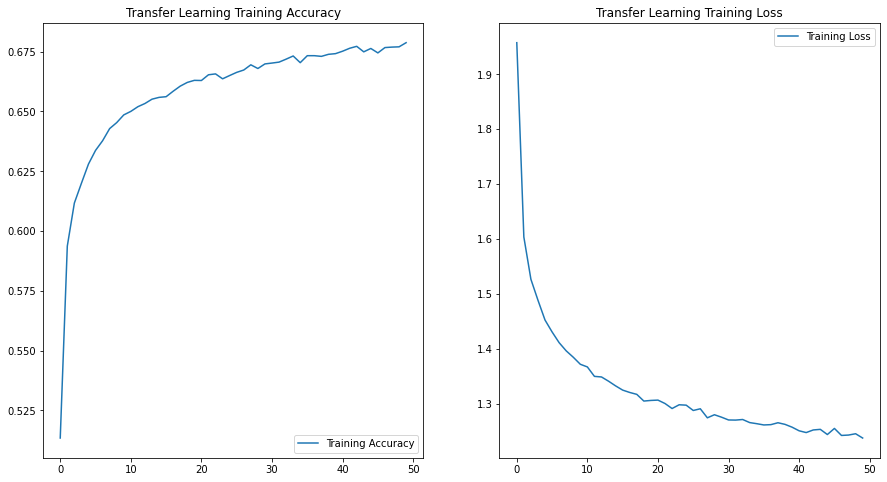

In [19]:
acc = efficientnet_model.history['accuracy']
top_k_acc = efficientnet_model.history['top_k_categorical_accuracy']

loss = efficientnet_model.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Transfer Learning Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Transfer Learning Training Loss')
plt.show()

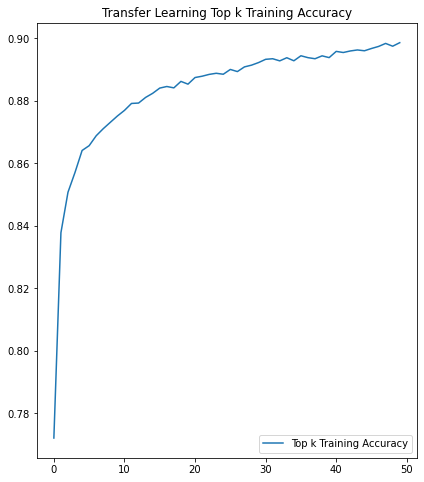

In [22]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, top_k_acc, label='Top k Training Accuracy')
plt.legend(loc='lower right')
plt.title('Transfer Learning Top k Training Accuracy')
plt.show()

## References

https://www.kaggle.com/code/codyyu23/transfer-learning